import the important backages 

In [101]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


read data

In [117]:
path =  r'D:\data science\datasets\pet\images'

do preprocessing on images by ImageDataGenerator

`data = ImageDataGenerator ( `


>rescale,->(if image  rescale to 0,1 instead of 0,255)`

 >rotation_range,->(support data veration, rotate data -20 ,20 degree)`
 
 
  >width_shift_range ->(This allows the image to be shifted horizontally by a random amount up to 20%  )`
  
  
   >height_shift_range,->(This allows the image to be shifted vertically by a random amount up to 20% )`
   
   
 >shear_range,->(This applies a random shear transformation (distortion or tilt) to the image. Shearing means changing the angle of the image)(bt4awahh el image 4oayaa)
    
    
>zoom_range,->(This applies a random zoom in or out on the image by up to 20%)`
    
    
>horizontal_flip,validation_split -> (if true , This means the images will be randomly flipped horizontally)`
     
     
>validation_split -> (split data in to train and validation set 0.2 means 20% of data will be used for validation)`

     ):
>do things that will implement on tha data at the path that i will send

In [103]:
data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.2
    )

i will split data into training and testing(validation) sets

`use the generator (what is come from ImageDataGenerator)`


`and implement flow_from_directory `


`flow_from_directory( directory(my path to my data), target_size=(224, 224), batch_size=64, class_mode='categorical',subset='training')`


`target_size -> size of each data i want to assigen (h,w)`


`batch_size ->num of parts(set of images) i want to use in each iteration`


`class_mode ->'categorical' represent that the data is categorical data`


`(binary , categorical, sparse, integer, float, etc.)`


`subset -> 'training' or 'validation'`

split to train

In [104]:
train_data = data.flow_from_directory (
    path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset = 'training'
)

Found 5913 images belonging to 2 classes.


split to validation

In [105]:
test_data = data.flow_from_directory (
    path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset = 'validation',

)


Found 1477 images belonging to 2 classes.


`MobileNetV2 this is model in deep learning for feature extraction`


`model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))`


`weights = 'imagenet' ->  Loads the weights of the model pre-trained on the ImageNet dataset. This provides a strong foundation for feature extraction.`
>because ImageNet dataset is a large dataset of images with 14 million images and 21,841 categories, so it is a good dataset for pre-training a model for feature extraction.


`include_top=False ->  This argument is used to include or exclude the classification head of the model`


`input_shape=(224, 224, 3) ->  Specifies the input shape of the model, which is 224x224 pixels with 3 color channels (RGB).`



extract_model.trainable = False : freeze the weights of the model


In [106]:
extract_model = MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
extract_model.trainable = False # freeze the layers(whights) to prevent overfitting 

In [107]:
def feature_extraction (data , extract_model):#extract_model-->MobileNetV2 model
    feats = []
    labels = []
    for x_batch , y_batch in data:
        feat_batch = extract_model.predict(x_batch) # implement the model on each patch
        feats.append(feat_batch)
        labels.append(y_batch)
        if len(feats) >= len(data):
            break
    return np.vstack(feats), np.vstack(labels)

In [108]:
x_train , y_train = feature_extraction(train_data,extract_model)
x_test , y_test = feature_extraction(test_data,extract_model)


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 987ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step   
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 977ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step   
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step   
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 993ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 965ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step   
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 953ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 904ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step   
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 990ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 978ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 967ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 920ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 833ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 972ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 956ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 983ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 963ms/step
2/

`Flatten the features`


In [109]:
X_train = x_train.reshape(x_train.shape[0], -1)
X_test = x_test.reshape(x_test.shape[0], -1)

`implement the KNN model`

In [110]:
k = 5
knn = KNeighborsClassifier (n_neighbors = k ,metric = 'minkowski',p=2) # to perform euclidean
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [111]:
y_pred = knn.predict(X_test)

In [112]:
print("Shape of y_test:", y_test.shape)
print("Example of y_test:", y_test[:5])

print("Shape of y_pred:", y_pred.shape)
print("Example of y_pred:", y_pred[:5])


Shape of y_test: (1477, 2)
Example of y_test: [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
Shape of y_pred: (1477, 2)
Example of y_pred: [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


y_test and y_pred  both have the same shape which is One-Hot Encoding

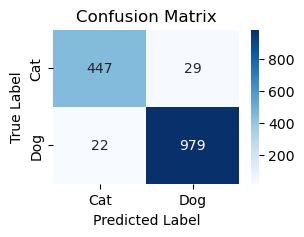

In [113]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize=(3,2))
sns.heatmap(cm,fmt = 'd',annot =True,cmap = 'Blues', xticklabels=['Cat','Dog'], yticklabels=['Cat','Dog'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [114]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       476
           1       0.97      0.98      0.97      1001

    accuracy                           0.97      1477
   macro avg       0.96      0.96      0.96      1477
weighted avg       0.97      0.97      0.97      1477



In [115]:
accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

0.965470548408937

In [125]:
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Generate synthetic dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Train KNN classifier
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)

# # Predict probabilities
# y_proba = knn.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# # Compute ROC curve and AUC
# fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# roc_auc = auc(fpr, tpr)

# # Plot the ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for KNN Classifier')
# plt.legend(loc='lower right')
# plt.grid(alpha=0.3)
# plt.show()

## if you want to input a new image and know what is it 

step 1:


### step1
>implement the preprocessing on image


>1.path of image


>2 and 3.resize image (from tensorflow.keras.preprocessing.image import load_img, img_to_array)


>4.add batch dimension by using (np.expand_dims(arr,axis = position)) -> this is add new dimensional by add new group to this dimension -> this is important if you want to use this image in models in tensorflow and keras


>5.Rescale if your model expects scaled input



In [ ]:
# import numpy as np
# from tensorflow.keras.preprocessing import image
# import matplotlib.pyplot as plt

# # 1. Load and preprocess the image
# img_path = r"D:\data science\datasets\pet\Screenshot 2024-12-15 002205.png" # Replace with the path to your image
# img = image.load_img(img_path, target_size=(224, 224))  # Resize to match the input size
# img_array = image.img_to_array(img)  # Convert the image to a NumPy array
# img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
# img_array /= 255.0  # Rescale if your model expects scaled input (e.g., from ImageDataGenerator)

# # 2. Extract features using the base model
# features = extract_model.predict(img_array)  # Shape: (1, 7, 7, 1280)
# features_flat = features.flatten().reshape(1, -1)  # Flatten and reshape for LogisticRegression

# # 3. Predict the class using KNN
# prediction = knn.predict(features_flat)  # Predict class index
# class_index = prediction[0]  # Extract the predicted class index

# # If `class_index` is still a numpy array, convert it to scalar
# if isinstance(class_index, np.ndarray):
#     class_index = class_index.item()

# # 4. Map class index to class labels
# class_labels = {0: 'Cat', 1: 'Dog'}  # Replace with your actual class labels
# predicted_label = class_labels[class_index]

# # 5. Display the result
# plt.imshow(img)
# plt.axis("off")
# plt.title(f"Predicted Class: {predicted_label}")
# plt.show()
